# Assignment 2 - CIC-1205

## Exercise 4 - SHAP Values

Student: Balthazar Paixão


In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

import shap

import warnings
warnings.filterwarnings("ignore")

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
def classify_precipitation(x):
    """
    •0 → NONE
    •(0, 5] → WEAK
    •(5, 25] → MODERATE
    •(25,50] → STRONG
    •(50, ∞] → EXTREME
    """

    if x <= 0:
        return 0  # "NONE"
    elif x <= 5:
        return 1  # "WEAK"
    elif x <= 25:
        return 2  # "MODERATE"
    elif x <= 50:
        return 3  # "STRONG"
    else:
        return 4  # "EXTREME"

In [3]:
SEED = 57

data_folder = "../class-repo/cic1205/data/atmoseer/"
files = [
    "A602",
    "A621",
    "A627",
    "A636",
    "A652",
]
end_train_name = "_train.parquet.gzip"
end_test_name = "_test.parquet.gzip"
end_val_name = "_val.parquet.gzip"

# A602


In [4]:
a602_train = f"{data_folder}{files[0]}{end_train_name}"
a602_test = f"{data_folder}{files[0]}{end_test_name}"
a602_val = f"{data_folder}{files[0]}{end_val_name}"

df_train = pd.read_parquet(a602_train)
df_test = pd.read_parquet(a602_test)
df_val = pd.read_parquet(a602_val)

In [5]:
df_train["precipitation"] = df_train["precipitation"].apply(
    classify_precipitation)
df_test["precipitation"] = df_test["precipitation"].apply(
    classify_precipitation)
df_val["precipitation"] = df_val["precipitation"].apply(classify_precipitation)

df_train = pd.concat([df_train, df_val])

In [6]:
X_train = df_train.drop(columns=["precipitation"])
y_train = df_train["precipitation"]

X_test = df_test.drop(columns=["precipitation"])
y_test = df_test["precipitation"]

In [7]:
scaler = StandardScaler()
cols_scaler = X_train.columns
X_train.loc[:, cols_scaler] = scaler.fit_transform(X_train)
X_test.loc[:, cols_scaler] = scaler.transform(X_test)

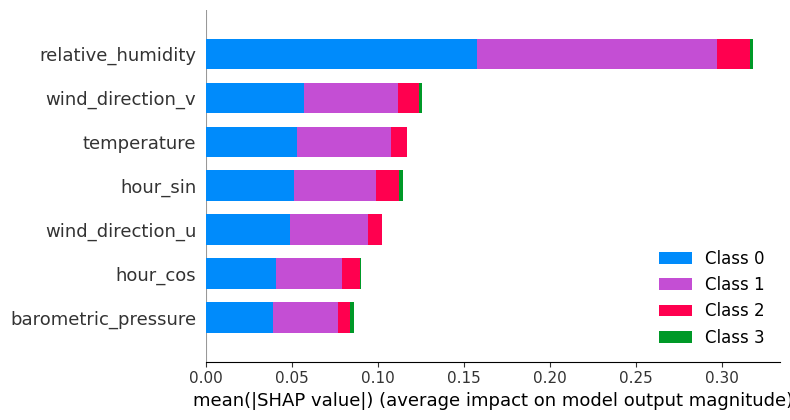

In [8]:
DT = DecisionTreeClassifier(random_state=SEED)
DT.fit(X_train, y_train)

explainer = shap.TreeExplainer(DT)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, show=False)


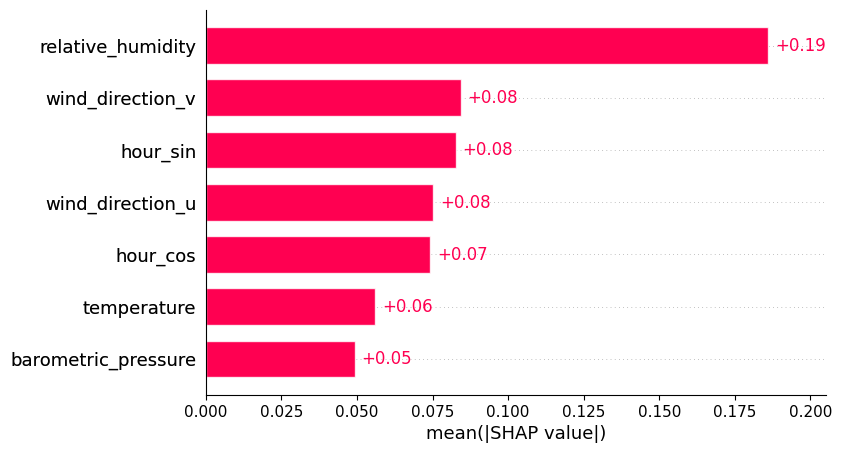

In [9]:
# Getting a sample of the data

X_test_sample = X_test.sample(n=500, random_state=SEED)

explainer = shap.Explainer(DT.predict, X_test_sample)
shap_values = explainer(X_test_sample)

shap.plots.bar(shap_values)

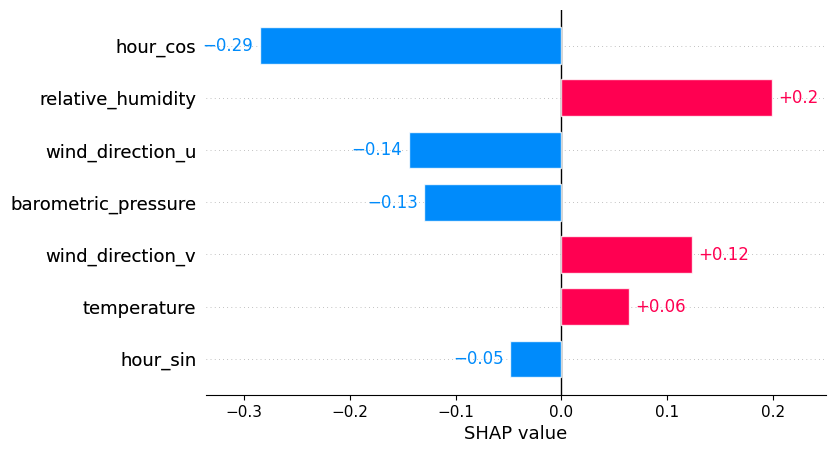

In [10]:
shap.plots.bar(shap_values[0])

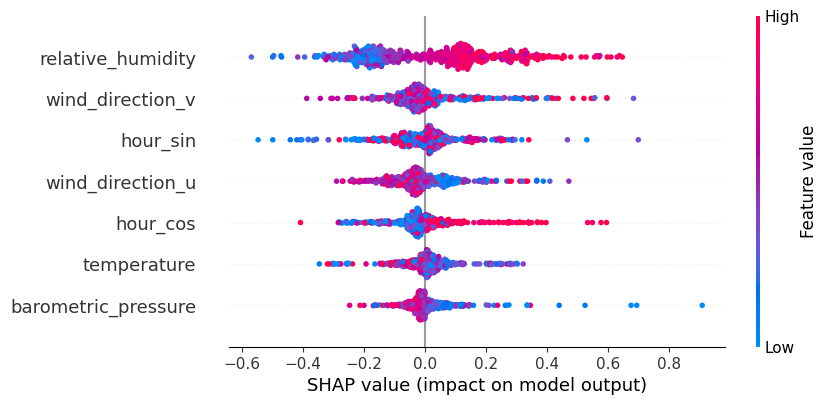

In [11]:
shap.plots.beeswarm(shap_values)

# A621


In [12]:
a621_train = f"{data_folder}{files[1]}{end_train_name}"
a621_test = f"{data_folder}{files[1]}{end_test_name}"
a621_val = f"{data_folder}{files[1]}{end_val_name}"

df_train = pd.read_parquet(a621_train)
df_test = pd.read_parquet(a621_test)
df_val = pd.read_parquet(a621_val)

In [13]:
df_train["precipitation"] = df_train["precipitation"].apply(
    classify_precipitation)
df_test["precipitation"] = df_test["precipitation"].apply(
    classify_precipitation)
df_val["precipitation"] = df_val["precipitation"].apply(classify_precipitation)

df_train = pd.concat([df_train, df_val])

In [14]:
X_train = df_train.drop(columns=["precipitation"])
y_train = df_train["precipitation"]

X_test = df_test.drop(columns=["precipitation"])
y_test = df_test["precipitation"]

In [15]:
scaler = StandardScaler()
cols_scaler = X_train.columns
X_train.loc[:, cols_scaler] = scaler.fit_transform(X_train)
X_test.loc[:, cols_scaler] = scaler.transform(X_test)

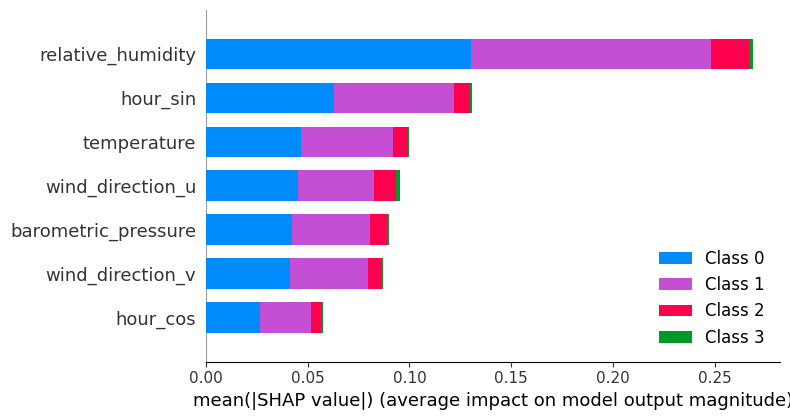

In [16]:
DT = DecisionTreeClassifier(random_state=SEED)
DT.fit(X_train, y_train)

explainer = shap.TreeExplainer(DT)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

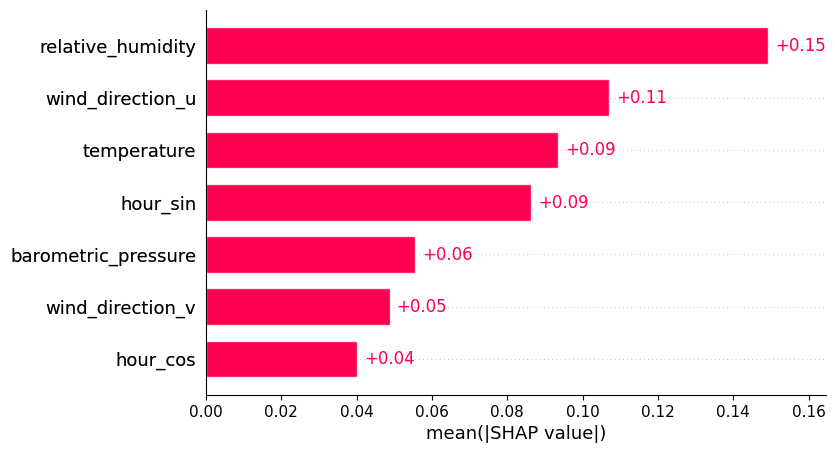

In [17]:
# Getting a sample of the data

X_test_sample = X_test.sample(n=500, random_state=SEED)

explainer = shap.Explainer(DT.predict, X_test_sample)
shap_values = explainer(X_test_sample)

shap.plots.bar(shap_values)

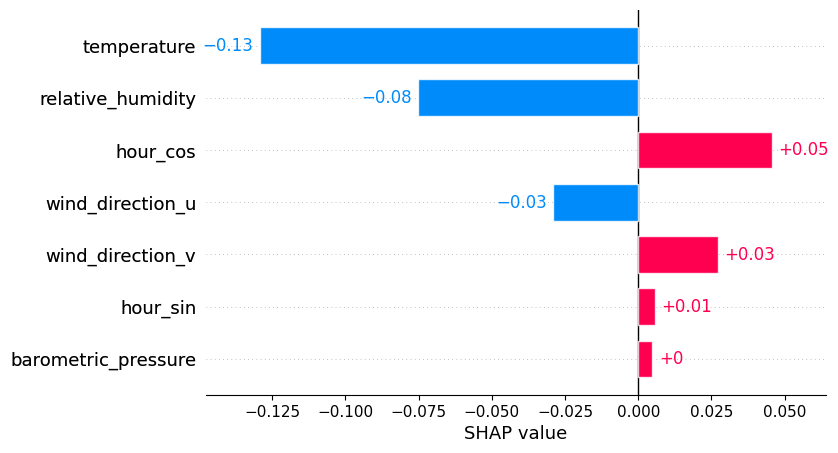

In [18]:
shap.plots.bar(shap_values[0])

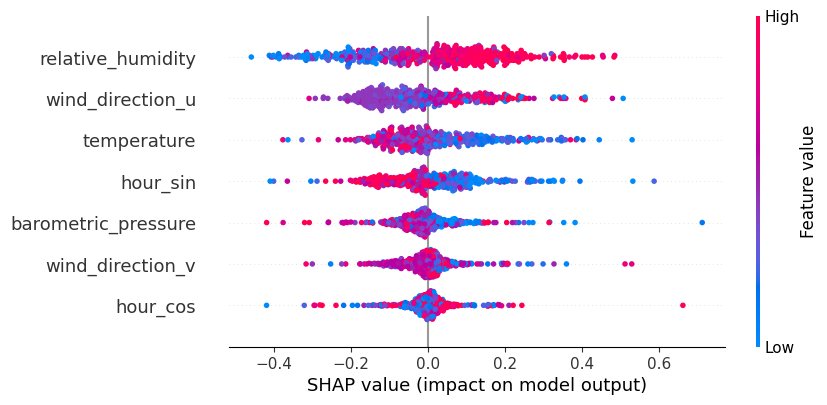

In [19]:
shap.plots.beeswarm(shap_values)

# A627


In [20]:
a627_train = f"{data_folder}{files[2]}{end_train_name}"
a627_test = f"{data_folder}{files[2]}{end_test_name}"
a627_val = f"{data_folder}{files[2]}{end_val_name}"

df_train = pd.read_parquet(a627_train)
df_test = pd.read_parquet(a627_test)
df_val = pd.read_parquet(a627_val)

In [21]:
df_train["precipitation"] = df_train["precipitation"].apply(
    classify_precipitation)
df_test["precipitation"] = df_test["precipitation"].apply(
    classify_precipitation)
df_val["precipitation"] = df_val["precipitation"].apply(classify_precipitation)

df_train = pd.concat([df_train, df_val])

In [22]:
X_train = df_train.drop(columns=["precipitation"])
y_train = df_train["precipitation"]

X_test = df_test.drop(columns=["precipitation"])
y_test = df_test["precipitation"]

In [23]:
scaler = StandardScaler()
cols_scaler = X_train.columns
X_train.loc[:, cols_scaler] = scaler.fit_transform(X_train)
X_test.loc[:, cols_scaler] = scaler.transform(X_test)

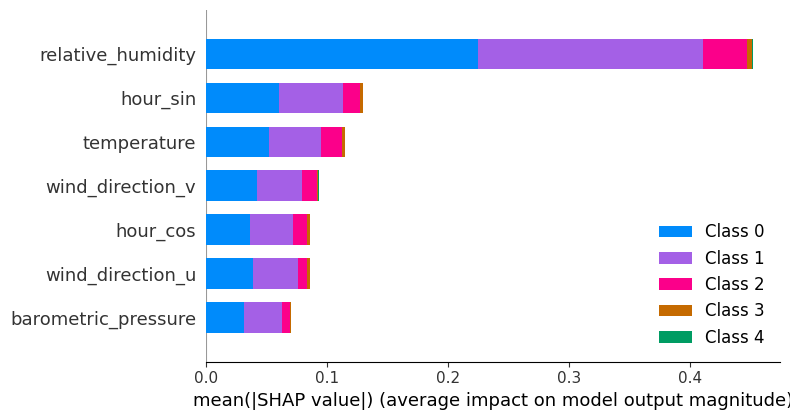

In [24]:
DT = DecisionTreeClassifier(random_state=SEED)
DT.fit(X_train, y_train)

explainer = shap.TreeExplainer(DT)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, show=False)


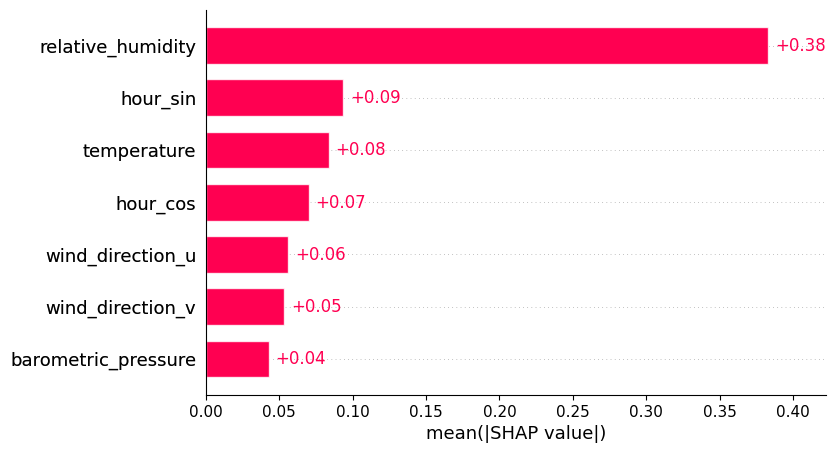

In [25]:
# Getting a sample of the data

X_test_sample = X_test.sample(n=500, random_state=SEED)

explainer = shap.Explainer(DT.predict, X_test_sample)
shap_values = explainer(X_test_sample)

shap.plots.bar(shap_values)

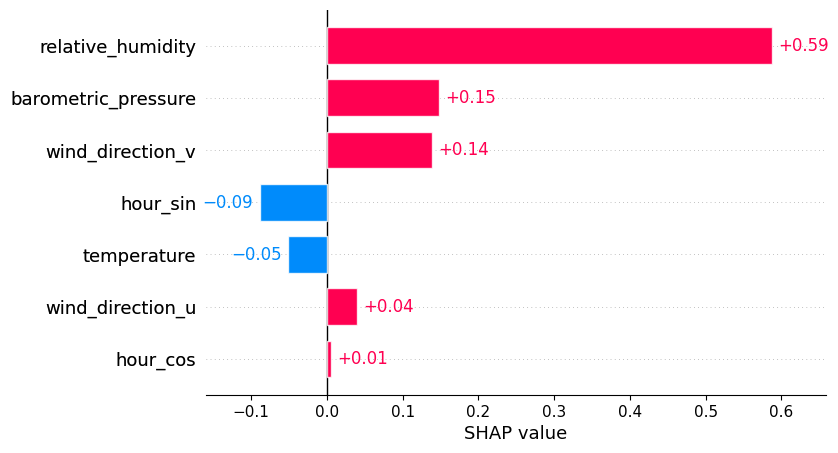

In [26]:
shap.plots.bar(shap_values[0])

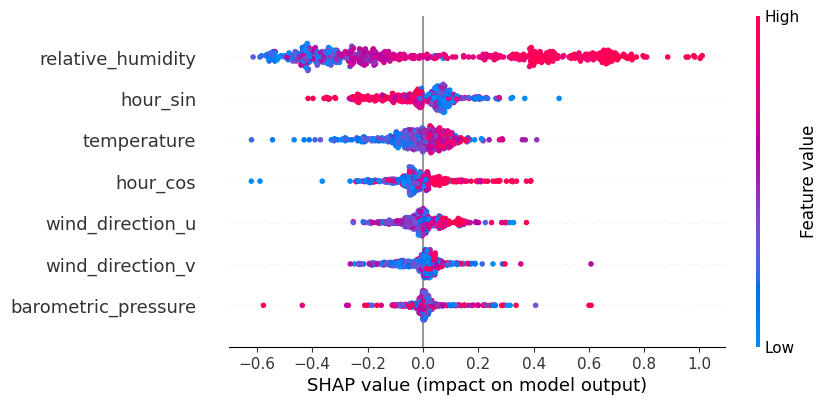

In [27]:
shap.plots.beeswarm(shap_values)

# A636


In [28]:
a636_train = f"{data_folder}{files[3]}{end_train_name}"
a636_test = f"{data_folder}{files[3]}{end_test_name}"
a636_val = f"{data_folder}{files[3]}{end_val_name}"

df_train = pd.read_parquet(a636_train)
df_test = pd.read_parquet(a636_test)
df_val = pd.read_parquet(a636_val)

In [29]:
df_train["precipitation"] = df_train["precipitation"].apply(
    classify_precipitation)
df_test["precipitation"] = df_test["precipitation"].apply(
    classify_precipitation)
df_val["precipitation"] = df_val["precipitation"].apply(classify_precipitation)

df_train = pd.concat([df_train, df_val])

In [30]:
X_train = df_train.drop(columns=["precipitation"])
y_train = df_train["precipitation"]

X_test = df_test.drop(columns=["precipitation"])
y_test = df_test["precipitation"]

In [31]:
scaler = StandardScaler()
cols_scaler = X_train.columns
X_train.loc[:, cols_scaler] = scaler.fit_transform(X_train)
X_test.loc[:, cols_scaler] = scaler.transform(X_test)

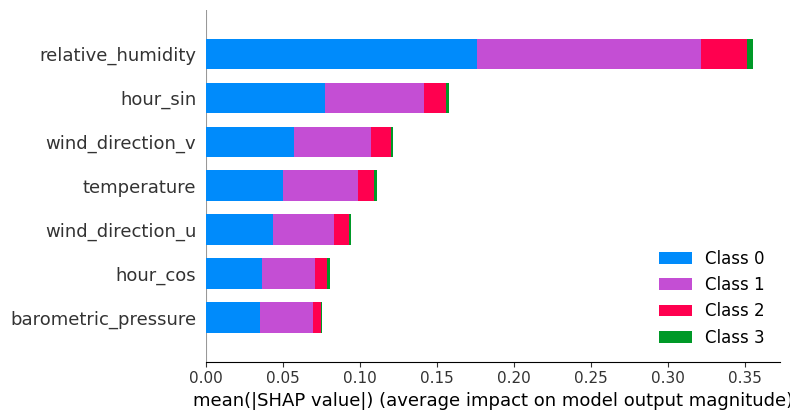

In [32]:
DT = DecisionTreeClassifier(random_state=SEED)
DT.fit(X_train, y_train)

explainer = shap.TreeExplainer(DT)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, show=False)


ExactExplainer explainer: 501it [00:11,  5.17it/s]                         


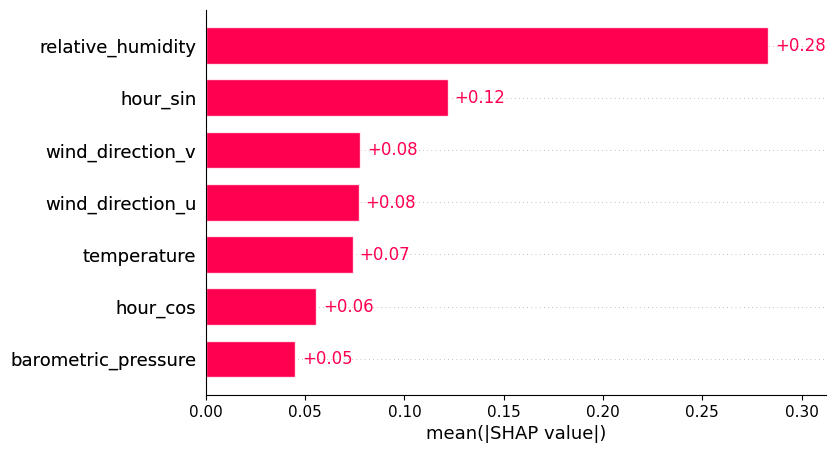

In [33]:
# Getting a sample of the data

X_test_sample = X_test.sample(n=500, random_state=SEED)

explainer = shap.Explainer(DT.predict, X_test_sample)
shap_values = explainer(X_test_sample)

shap.plots.bar(shap_values)

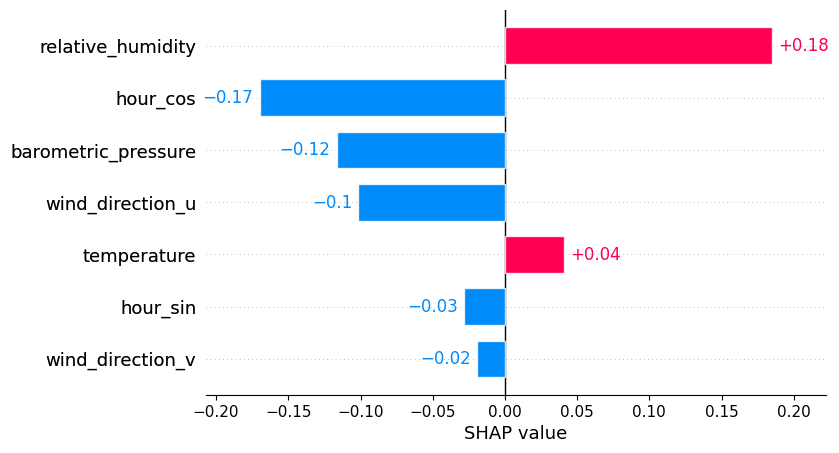

In [34]:
shap.plots.bar(shap_values[0])

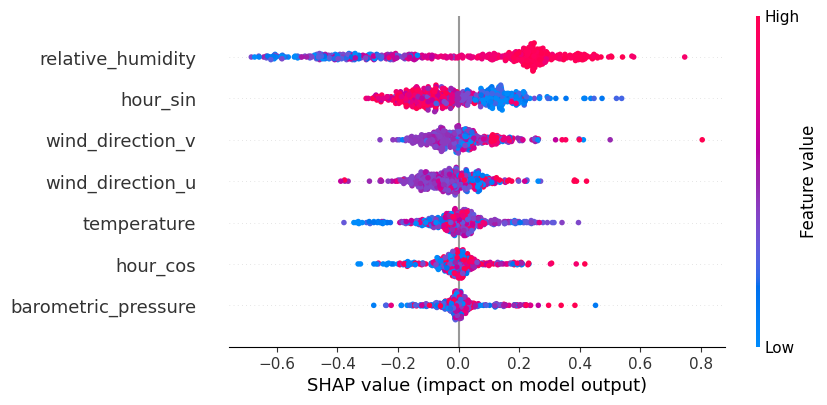

In [35]:
shap.plots.beeswarm(shap_values)

# A652


In [36]:
a652_train = f"{data_folder}{files[4]}{end_train_name}"
a652_test = f"{data_folder}{files[4]}{end_test_name}"
a652_val = f"{data_folder}{files[4]}{end_val_name}"

df_train = pd.read_parquet(a652_train)
df_test = pd.read_parquet(a652_test)
df_val = pd.read_parquet(a652_val)

In [37]:
df_train["precipitation"] = df_train["precipitation"].apply(
    classify_precipitation)
df_test["precipitation"] = df_test["precipitation"].apply(
    classify_precipitation)
df_val["precipitation"] = df_val["precipitation"].apply(classify_precipitation)

df_train = pd.concat([df_train, df_val])

In [38]:
X_train = df_train.drop(columns=["precipitation"])
y_train = df_train["precipitation"]

X_test = df_test.drop(columns=["precipitation"])
y_test = df_test["precipitation"]

In [39]:
scaler = StandardScaler()
cols_scaler = X_train.columns
X_train.loc[:, cols_scaler] = scaler.fit_transform(X_train)
X_test.loc[:, cols_scaler] = scaler.transform(X_test)

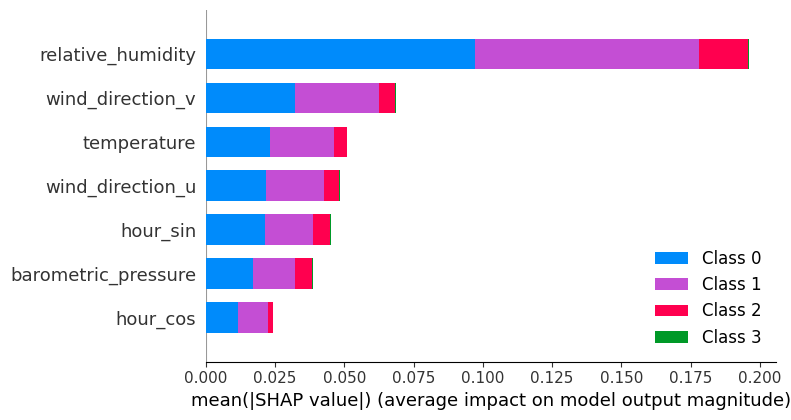

In [40]:
DT = DecisionTreeClassifier(random_state=SEED)
DT.fit(X_train, y_train)

explainer = shap.TreeExplainer(DT)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, show=False)


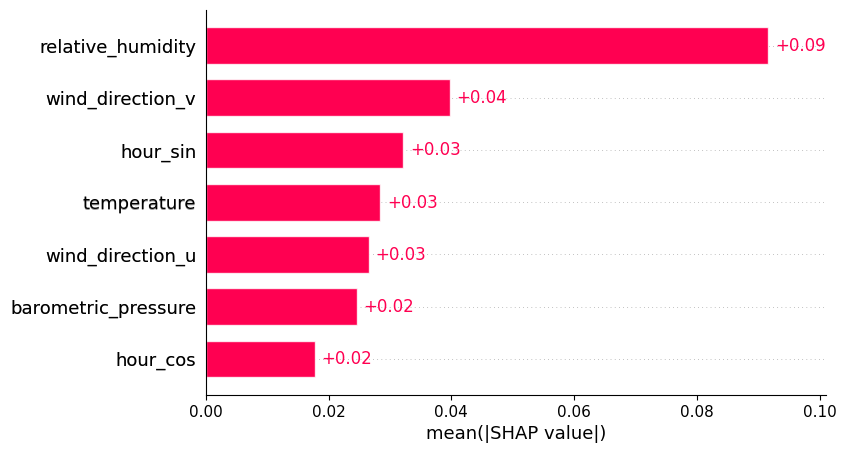

In [41]:
# Getting a sample of the data

X_test_sample = X_test.sample(n=500, random_state=SEED)

explainer = shap.Explainer(DT.predict, X_test_sample)
shap_values = explainer(X_test_sample)

shap.plots.bar(shap_values)

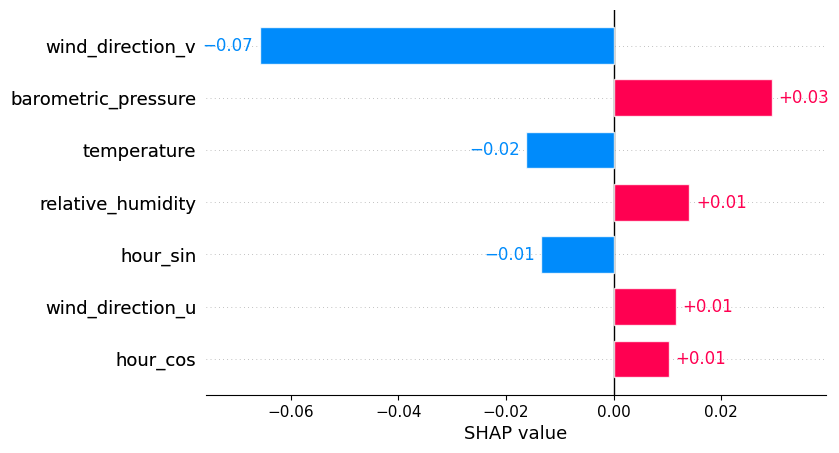

In [42]:
shap.plots.bar(shap_values[0])

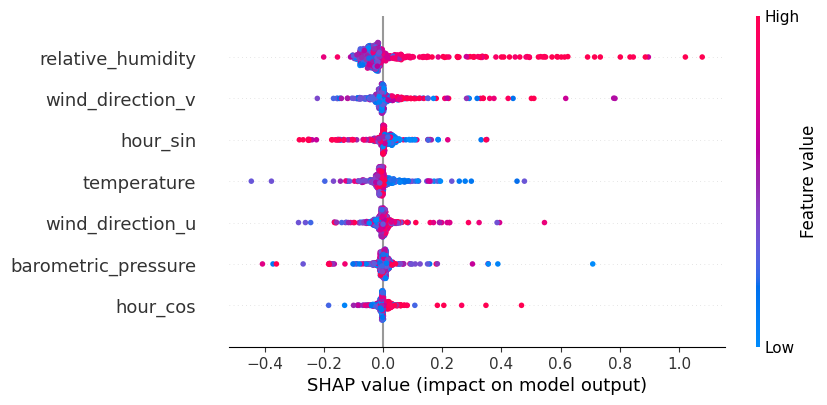

In [43]:
shap.plots.beeswarm(shap_values)